In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lesson 31: Least Squares Error

In [2]:
def standard_units(arr):
    """ Converts an array to standard units """
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    """ Computes correlation: t is a table, and x and y are column names """
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    """ Computes the slope of the regression line, like correlation above """
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    """ Computes the intercept of the regression line, like slope above """
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates (predictions) at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [3]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

### Regression line vs other lines

In [4]:
demographics = Table.read_table('data/district_demographics2016.csv')
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(10)

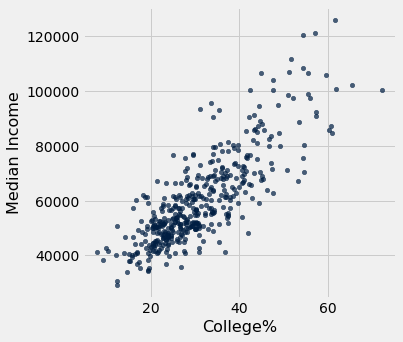

In [5]:
demographics.scatter('College%', 'Median Income')

In [6]:
correlation(demographics, 'College%', 'Median Income')

0.8184648517141335

In [7]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
regression_slope, regression_intercept

(1270.70168946388, 20802.577766677925)

In [8]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

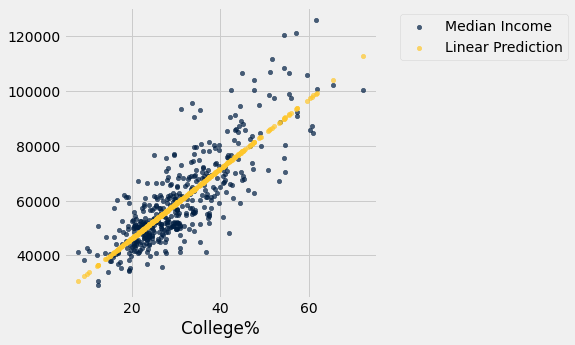

In [9]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [10]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [11]:
demographics.with_column('Error', errors)

Median Income | College% | Linear Prediction | Error
47083         | 24       | 51299.4           | -4216.42
42035         | 21.8     | 48503.9           | -6468.87
46544         | 22.8     | 49774.6           | -3230.58
41110         | 17       | 42404.5           | -1294.51
51690         | 30.3     | 59304.8           | -7614.84
61413         | 36.7     | 67437.3           | -6024.33
34664         | 19.4     | 45454.2           | -10790.2
76440         | 29.6     | 58415.3           | 18024.7
50537         | 24.5     | 51934.8           | -1397.77
49072         | 34       | 64006.4           | -14934.4
... (425 rows omitted)

In [12]:
demographics.with_column('Error', errors).where('College%', are.contained_in([14.7, 19.1, 50.7, 59.5]))

Median Income | College% | Linear Prediction | Error
105918        | 59.5     | 96409.3           | 9508.67
61454         | 19.1     | 45073             | 16381
33995         | 14.7     | 39481.9           | -5486.89
71183         | 50.7     | 85227.2           | -14044.2

In [13]:
np.mean(errors ** 2)

88332095.26861739

In [14]:
np.sum(errors)

2.764863893389702e-10

In [ ]:
np.mean(errors ** 2) ** 0.5

In [ ]:
demographics_errors(regression_slope, regression_intercept)

In [ ]:
# takes any slope, any intercept

demographics_errors(1500, 20000)

In [ ]:
demographics_errors(-1000, 75000)

### Root Mean Square Error ###

In [15]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Root mean squared error: 30247.88


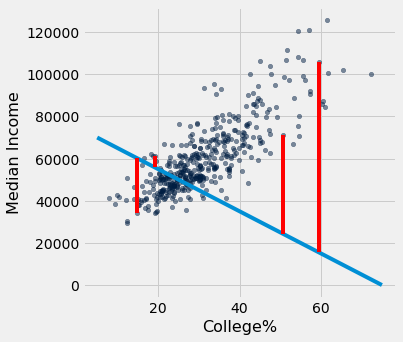

In [16]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 11559.09


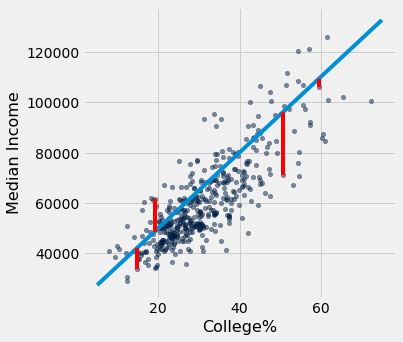

In [17]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 9398.52


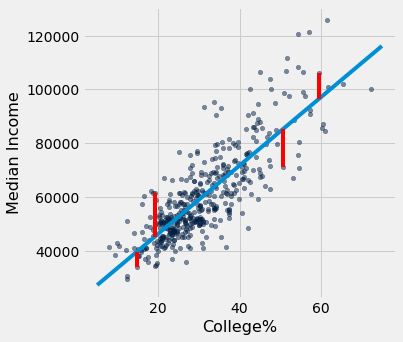

In [18]:
show_demographics_rmse(regression_slope, regression_intercept)

### Numerical Optimization ###

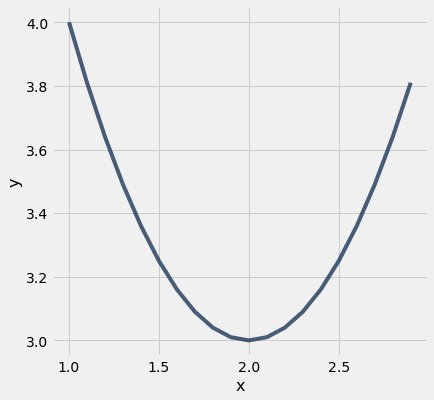

In [19]:
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [20]:
def f(x):
    return ((x-2)**2) + 3

## ✨The `minimize` function ✨

This function is built into the `datascience` library we provide in this course. It takes in a function, and will play around with the inputs (assuming they are numerical) and determine the combination of inputs that will minimize the function you specified. You don't need to know how it works for this course, but you are free to use it!

In [21]:
minimize(f)

1.9999999946252267

In [22]:
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 

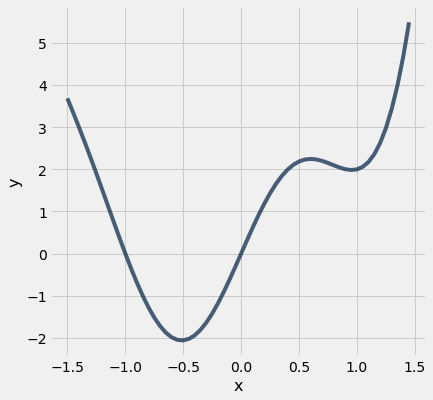

In [23]:
x = np.arange(-1.5, 1.5, 0.05)
y2 = complicated_function(x)
Table().with_columns('x', x, 'y', y2).plot('x')

In [24]:
minimize(complicated_function)

-0.5126437620940081

### Minimizing RMSE ###

In [25]:
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [26]:
demographics_rmse(1500, 20000)

11559.086490075999

In [27]:
demographics_rmse(-1000, 75000)

30247.883767944502

In [28]:
minimize(demographics_rmse)

array([ 1270.70168805, 20802.57933807])

In [29]:
# Putting the earlier calculation we did into an array
# so you can compare to the results of minimize(demographics_rmse)
make_array(regression_slope, regression_intercept)

array([ 1270.70168946, 20802.57776668])

### Nonlinear Regression ###

In [30]:
shotput = Table.read_table('data/shotput.csv')
shotput

Weight Lifted | Shot Put Distance
37.5          | 6.4
51.5          | 10.2
61.3          | 12.4
61.3          | 13
63.6          | 13.2
66.1          | 13
70            | 12.7
92.7          | 13.9
90.5          | 15.5
90.5          | 15.8
... (18 rows omitted)

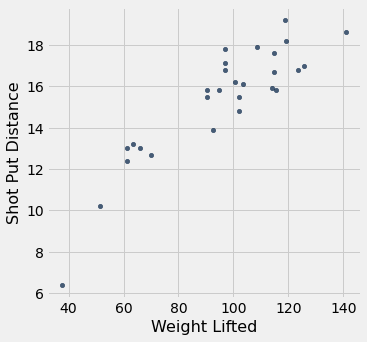

In [31]:
shotput.scatter('Weight Lifted')

In [32]:
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [33]:
best_line = minimize(shotput_linear_rmse)
best_line

array([0.09834382, 5.95962883])

In [34]:
weights = shotput.column(0)

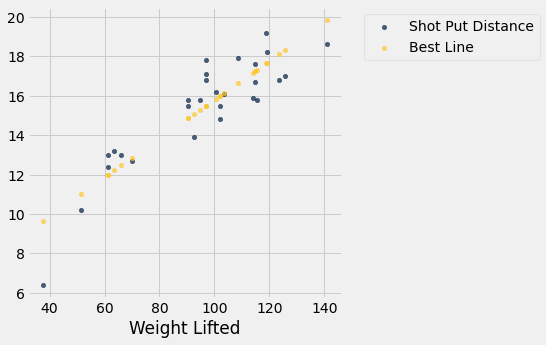

In [35]:
linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

In [36]:
correlation(shotput, 'Shot Put Distance', 'Weight Lifted')

0.8929919094772174

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [37]:
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c
    return np.mean((y - estimate) ** 2) ** 0.5

In [38]:
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([-1.04003731e-03,  2.82706003e-01, -1.53167618e+00])

In [41]:
# x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [39]:
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

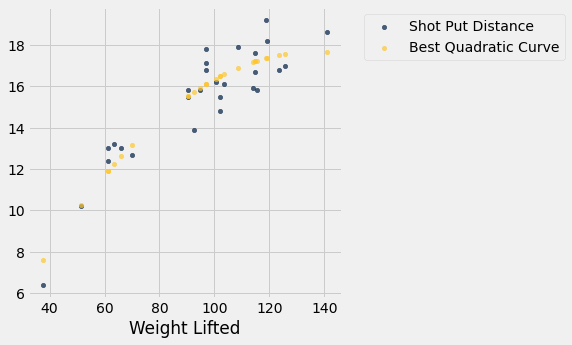

In [40]:
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)